<a href="https://www.kaggle.com/choureymanas/red-wine-quality-prediction?scriptVersionId=86608703" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


Welcome to my notebook, please give and upvote if you like it and feel free to share any feedback in the comments.In this notebook we are going to deep dive into the red wine quality dataset, study the dataset and apply a classification model to predict the quality.

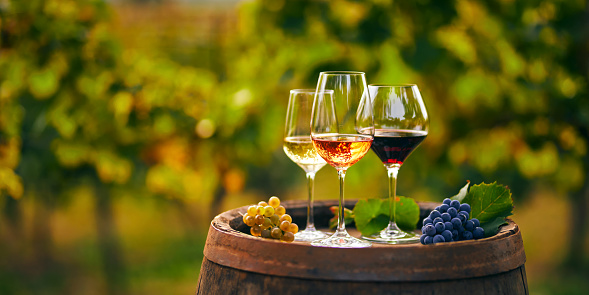

# DATA PROPERTIES

In [2]:
#reading the file
df = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

In [3]:
#Lets take a glimpse of the dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#Checking null values in each column
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#Checking length of dataset
print(df.shape)

(1599, 12)


In [8]:
#Target variable
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# DATA VISUALIZATION

In [9]:
import plotly.express as px
df_new = df['quality'].value_counts().rename_axis('Winequality').reset_index(name='counts')
df_new
fig = px.pie(df_new, values='counts', names='Winequality')
fig.show()

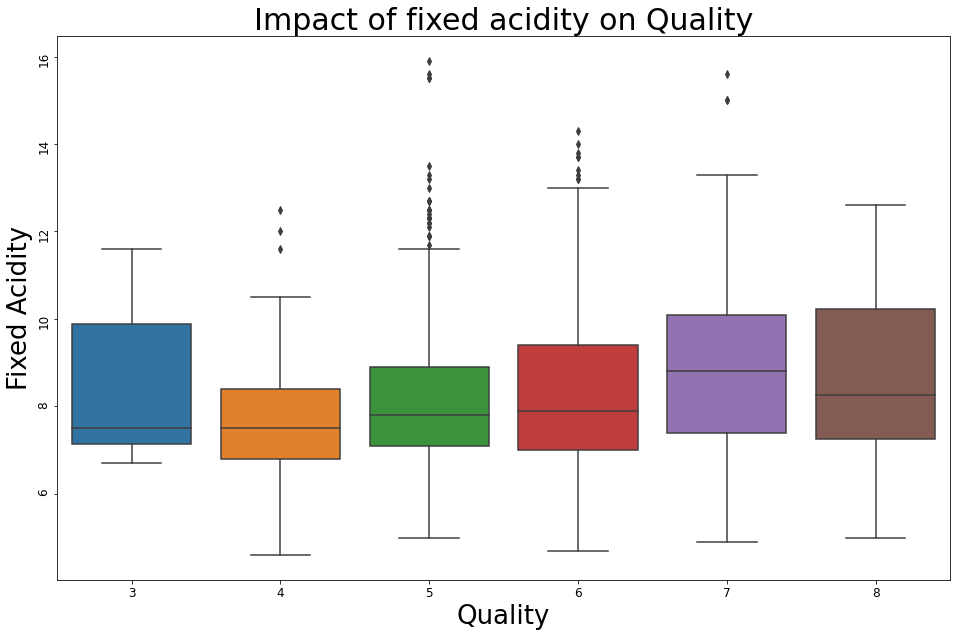

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
sns.boxplot(y='fixed acidity',x='quality',data=df)
plt.yticks(rotation =90,fontsize=12)
plt.xticks(fontsize=12)
plt.title("Impact of fixed acidity on Quality",fontsize=30)
plt.xlabel('Quality',fontsize=26)
plt.ylabel('Fixed Acidity',fontsize=26)
plt.show()

As per above distribution, lets create a binary feature for wine quality having two values Good(1) and Bad(0)

In [11]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
df['Good'] =df['quality'].apply(lambda x : 1 if(x>5) else 0)
df.drop(['quality'],inplace=True,axis=1)

In [13]:
#Lets see if we have a balanced distribution 
df['Good'].value_counts()

1    855
0    744
Name: Good, dtype: int64

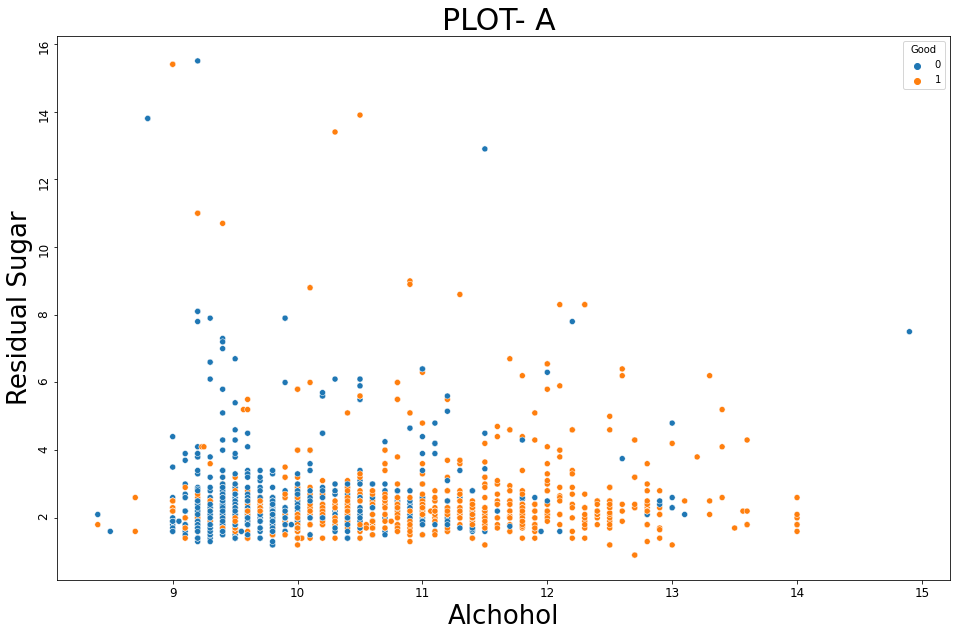

In [14]:
plt.figure(figsize=(16,10))
sns.scatterplot(x='alcohol',y='residual sugar',data=df,hue='Good')
plt.yticks(rotation =90,fontsize=12)
plt.xticks(fontsize=12)
plt.title("PLOT- A ",fontsize=30)
plt.xlabel('Alchohol',fontsize=26)
plt.ylabel('Residual Sugar',fontsize=26)
plt.show()


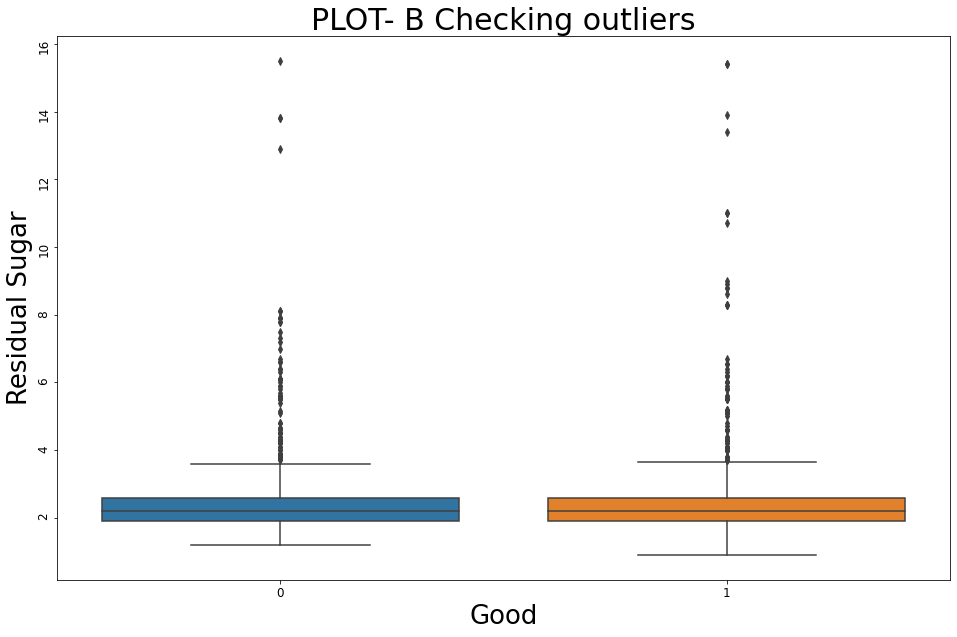

In [15]:
plt.figure(figsize=(16,10))
sns.boxplot(y='residual sugar',x='Good',data=df)
plt.yticks(rotation =90,fontsize=12)
plt.xticks(fontsize=12)
plt.title("PLOT- B Checking outliers",fontsize=30)
plt.xlabel('Good',fontsize=26)
plt.ylabel('Residual Sugar',fontsize=26)
plt.show()


There are certain outliers in our data here

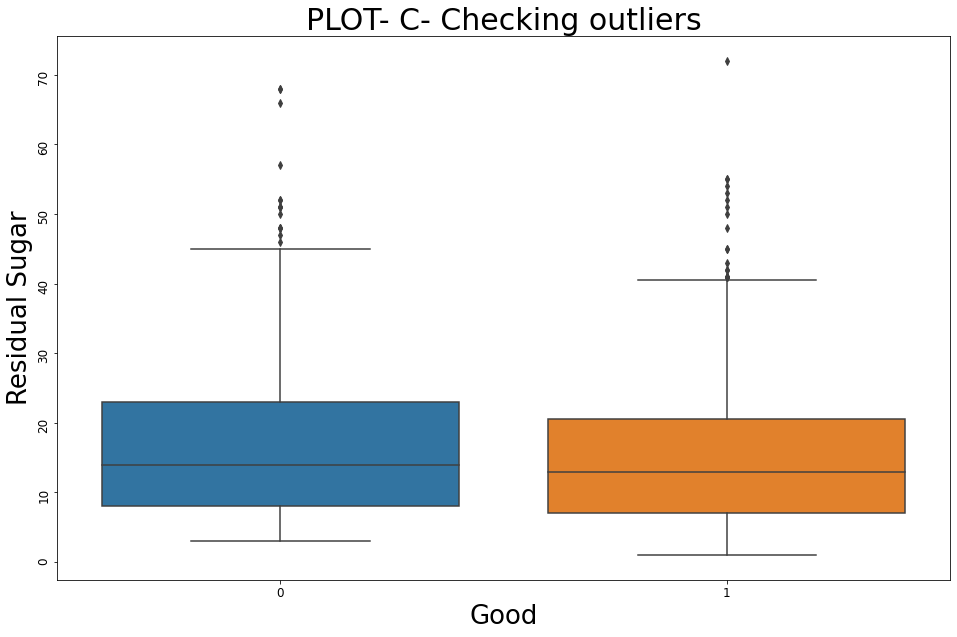

In [16]:
plt.figure(figsize=(16,10))
sns.boxplot(y='free sulfur dioxide',x='Good',data=df)
plt.yticks(rotation =90,fontsize=12)
plt.xticks(fontsize=12)
plt.title("PLOT- C- Checking outliers",fontsize=30)
plt.xlabel('Good',fontsize=26)
plt.ylabel('Residual Sugar',fontsize=26)
plt.show()

We can see some outliers for Free Sulphur Dioxide.

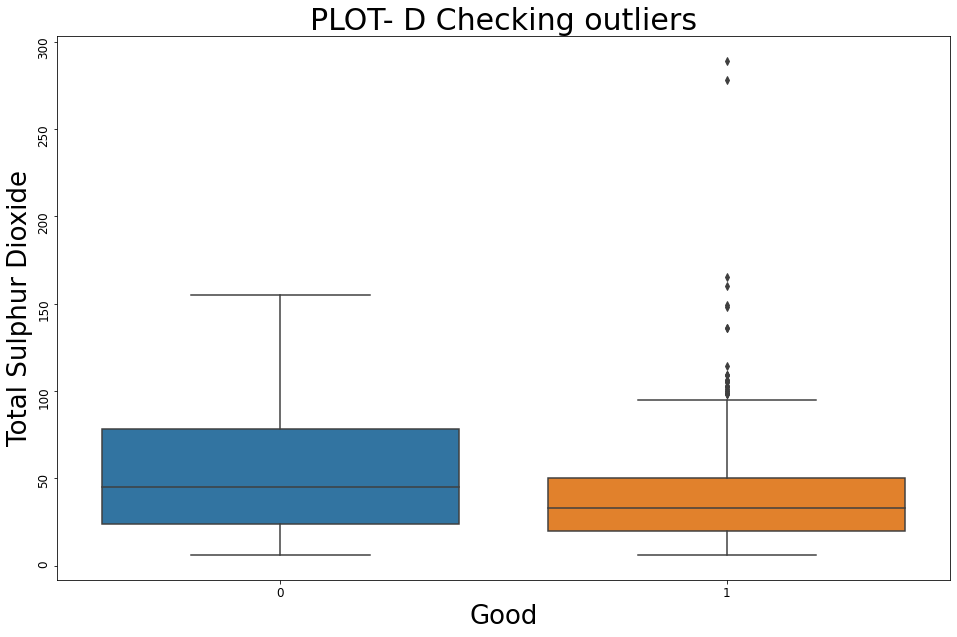

In [17]:
plt.figure(figsize=(16,10))
sns.boxplot(y='total sulfur dioxide',x='Good',data=df)
plt.yticks(rotation =90,fontsize=12)
plt.xticks(fontsize=12)
plt.title("PLOT- D Checking outliers",fontsize=30)
plt.xlabel('Good',fontsize=26)
plt.ylabel('Total Sulphur Dioxide',fontsize=26)
plt.show()

We can see some outliers for Total Sulphur Dioxide , for Good Quality Wine. 

# DATA PREPARATION

In [18]:
#Data preparation
X = df.drop(['Good'],axis=1)
Y = df['Good']
del df

In [19]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30,random_state = 90)

# DATA MODELLING AND TUNING

To classify wine as good or not we will use Random Forest Algorithm.It is an ensemble model, basically it considers outputs from multiple trees trained on data and reports the output given by the majority of trees.  

In [20]:
#model building - Random Forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

***Using Hyperparameter Tuning***<br>
Since there are multiple model parameters, we need to find the best parameters. This is where Hyperparameter tuning is used.It basically uses a defined grid of parameters and checks the model performance on different combinations of parameters and reports the set of parameters on which we have the best model performance.

There are 2 techniques for Hyperparameter tuning :
1. RandomizedSearchCV - Checks on random combinations.
2. GridSearchCV - Checks on all combinantions

We will use Randomized search CV as it is efficient and less time consuming.

In [23]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Criterion
criterion = ['gini','entropy']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [24]:
rf_tune = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_tune,
                               param_distributions = random_grid,
                               n_iter = 100,
                               cv = 3,
                               verbose=2,
                               random_state=42,
                               n_jobs = -1)
rf_random.fit(X_train,Y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   48.2s


[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=20, criterion=gini, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=20, criterion=gini, bootstrap=False, total=   0.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=20, criterion=gini, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=20, criterion=gini, bootstrap=False, total=   0.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=20, criterion=gini, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=20, criterion=gini, bootstrap=False, total=   0.8s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, criterion=gini, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=5, m

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.4min



[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, criterion=entropy, bootstrap=False, total=   9.4s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, criterion=gini, bootstrap=False 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, criterion=gini, bootstrap=False, total=   4.6s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=60, criterion=entropy, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=60, criterion=entropy, bootstrap=True, total=   5.5s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, criterion=entropy, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, criterion=entropy, bootstrap=True, total=   2.9s
[CV] n_es

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [25]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20,
 'criterion': 'gini',
 'bootstrap': True}

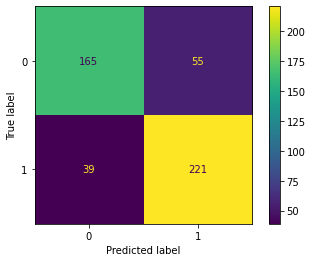

In [26]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_random,X_test,Y_test)

In [27]:
Y_pred = rf_random.predict(X_test)

In [28]:
accuracy_score(Y_test,Y_pred)

0.8041666666666667

In [29]:
f1_score(Y_test,Y_pred)

0.8246268656716418

 Finally we got an accuracy of 80.41 % with an f1 score of 0.82.